In [78]:
import pandas as pd # библиотека для работы с данными
import matplotlib.pyplot as plt # библиотека для создания различных типов диаграмм
from statsmodels.tsa.arima.model import ARIMA # библиотека для моделирования временных рядов

# Сканер

In [79]:
scaner_id = pd.read_excel('/Users/matveyvolshchukov/Desktop/Done_Arima/2024_ИндЗаданиеARIMA/!Исходные данные за 4 дня/Данные для Арима ЛПЦ11/Сканер/LPC_Scaner_Data_ID.xlsx') # считывание данных
scaner_to = pd.read_excel('/Users/matveyvolshchukov/Desktop/Done_Arima/2024_ИндЗаданиеARIMA/!Исходные данные за 4 дня/Данные для Арима ЛПЦ11/Сканер/LPC_Scaner_Data_to.xlsx') # считывание данных

In [80]:
scaner_id # вывод таблицы сканер ID

,Дата,ID
0,24-03-28 23:01:16.338,65668
1,24-03-28 22:51:16.409,65247
2,24-03-28 22:49:16.215,65248
3,24-03-28 22:46:16.547,65253
4,24-03-28 22:44:20.586,65241
...,...,...
1238,24-03-24 23:24:23.543,64267
1239,24-03-24 23:21:23.563,64266
1240,24-03-24 23:21:23.422,64264
1241,24-03-24 23:15:24.493,64276


In [81]:
scaner_id['Дата'] = pd.to_datetime(scaner_id['Дата']) # преобразование признака даты в тип данных даты и времени
scaner_id['Дата'] = scaner_id['Дата'].dt.strftime('%y-%m-%d %H') # представление даты в формате год-месяц-день час
scaner_id.set_index('Дата', inplace=True) # установка даты как индексы таблицы

Пеобразование признака "Дата" в тип данных дата и время.

In [82]:
scaner_id['id_count'] = scaner_id.groupby('Дата')['ID'].count() # группировка данных по дате и подсчет ID в эту дату

Подсчет количества id по дате.

In [83]:
scaner_id.drop(['ID'], axis=1, inplace=True) # удаление признака ID из данных

Удаление признака ID из данных, так как для обучения будет использоваться id_count

In [84]:
scaner_id.drop_duplicates(inplace=True) # удаление дубликатов из данных

Удаление дубликатов из данных.

In [85]:
scaner_id = scaner_id.sort_index(ascending=True) # сортировка индексов по возрастанию

Сортировка индексов(даты) по возрастанию, так как прогнозирование временного ряда происходит на следующий период после обучения модели.

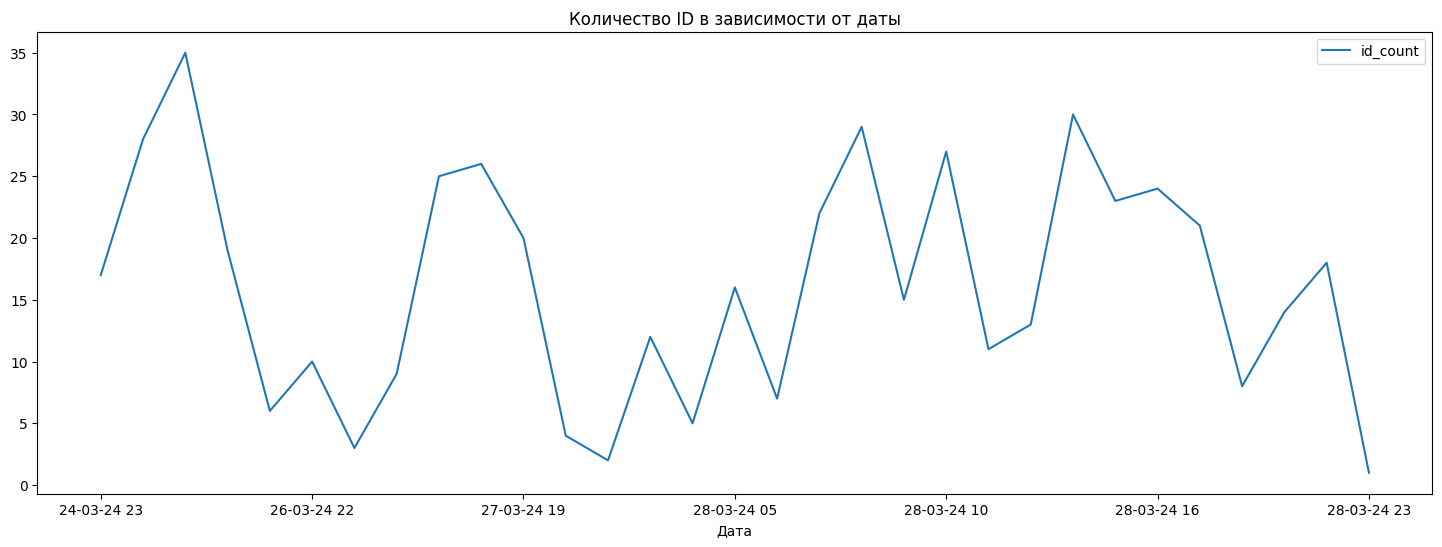

In [86]:
scaner_id.plot(figsize=(18, 6)) # построение линейного графика размера (18;6)
plt.title('Количество ID в зависимости от даты') # название графика
plt.show() # демонстрация графика

График по всем исходным данным.

## Разделение данных на обучающую и тестовую выборки.

In [87]:
alpha = int(len(scaner_id) * 0.7) # определение порога разделения данных
train_sc = scaner_id[:alpha] # обучающая выборка
test_sc = scaner_id[alpha:] # тестовая выборка

alpha - порог разделения данных на тестовую и обучающую выборки.

In [88]:
train_sc # вывод таблицы обучающей выборки

,id_count
Дата,
24-03-24 23,17
25-03-24 11,28
26-03-24 17,35
26-03-24 18,19
26-03-24 21,6
26-03-24 22,10
27-03-24 01,3
27-03-24 12,9
27-03-24 15,25


In [89]:
test_sc # вывод таблицы тестовой выборки

,id_count
Дата,
28-03-24 12,11
28-03-24 13,13
28-03-24 14,30
28-03-24 15,23
28-03-24 16,24
28-03-24 18,21
28-03-24 19,8
28-03-24 21,14
28-03-24 22,18


In [90]:
import warnings # библиотека, необходимая для того, чтобы скрыть предупреждения об обучении модели

warnings.simplefilter(action = 'ignore', category = Warning) # скрытие предупреждений

model_sc = ARIMA(train_sc, order=(7,1,2)) # определение модели на случайных параметрах
model_fit_sc = model_sc.fit() # обучение модели на случайных параметрах

warnings используется для того, чтобы не выходили предупреждения об обучении модели Arima.

In [91]:
start = len(train_sc) # точка начала прогнозирования
end = len(train_sc) + len(test_sc) - 1 # точка окончания прогнозирования

predictions_sc = model_fit_sc.predict(start, end) # прогнозирование модели
predictions_sc.index = test_sc.index # установка тех же индексов прогнозов модели, что и у тестовой выборки 
predictions_sc # вывод полученных предсказания

Дата
28-03-24 12    10.410011
28-03-24 13    10.591696
28-03-24 14    11.600886
28-03-24 15     6.429514
28-03-24 16    23.071304
28-03-24 18    15.188341
28-03-24 19    19.862521
28-03-24 21    18.503785
28-03-24 22     8.998805
28-03-24 23    16.232470
Name: predicted_mean, dtype: float64

Предсказания для тестовой выборки на случайных параметрах p, d, q.

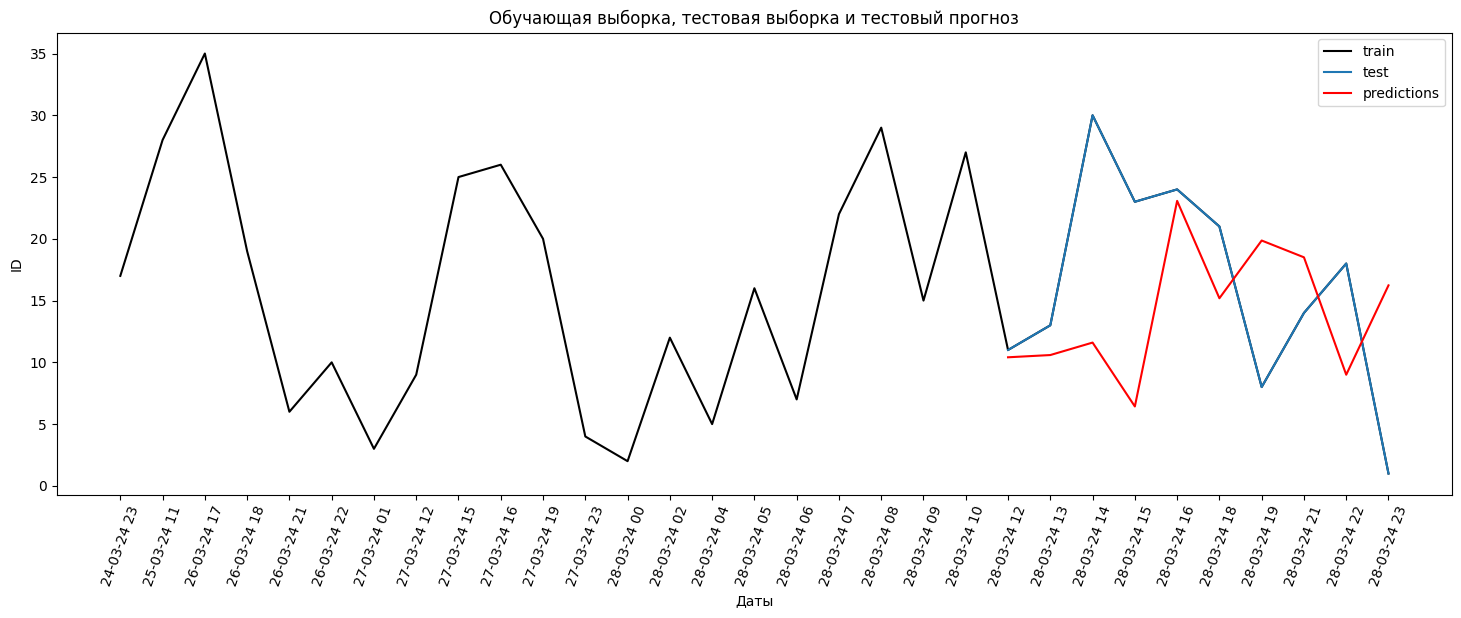

In [92]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='train') # отрисовка графика обучающей выборки
plt.plot(test_sc, label='test') # отрисовка графика тестовой выборки
plt.plot(predictions_sc, color='red', label='predictions') # отрисовка графика прогнозов 


plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз') # название графика
plt.legend() # легенда графика
plt.ylabel('ID') # название оси y
plt.xlabel('Даты') # название оси x
plt.xticks(scaner_id.index, rotation=70) # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика

График прогнозирования на случайных параметрах p, d, q.

## Подбор параметров p, d, q

In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error # импорт метрик из библиотеки sklearn
from sklearn.model_selection import ParameterGrid # сетка параметров, с помощью которой будет осуществляться подбор

In [94]:
parameters = {'p': range(0, 10), 'd': range(0, 4), 'q': range(0, 10)} # Определяем множество возможных комбинаций параметров модели ARIMA

met_mse = [] # Список для хранения метрик MSE
met_mae = [] # Список для хранения метрик MAE
met_r2 = [] # Список для хранения метрик R2
met_mape = [] # Список для хранения метрик MAPE

for params in ParameterGrid(parameters): # Итерация по всем комбинациям параметров
    try:
        model = ARIMA(train_sc, order=(params['p'], params['d'], params['q'])) # Создание модели ARIMA с указанными параметрами
        model_fit = model.fit() # Обучение модели

        predictions = model_fit.forecast(steps=len(test_sc)) # Прогнозирование значений для тестового набора данных

        metric_mse = mean_squared_error(test_sc, predictions) # Расчет метрики MSE
        met_mse.append((params, metric_mse)) # Добавление значений параметров и метрики MSE в список

        metric_mae = mean_absolute_error(test_sc, predictions) # Расчет метрики MAE
        met_mae.append((params, metric_mae)) # Добавление значений параметров и метрики MAE в список

        metric_r2 = r2_score(test_sc, predictions) # Расчет метрики R2
        met_r2.append((params, metric_r2)) # Добавление значений параметров и метрики R2 в список

        metric_mape = mean_absolute_percentage_error(test_sc, predictions) # Расчет метрики MAPE
        met_mape.append((params, metric_mape)) # Добавление значений параметров и метрики MAPE в список
    except: # Если произошла ошибка во время итерации, пропускаем итерацию
        continue

Диапазон range(0, 10) выбран, чтобы охватить достаточный спектр возможных лагов, которые могут быть важными для модели, и при этом подбор параметров не занимал слишком много времени. В качестве метрик выбраны MAE, MSE, R2 и MAPE.

In [95]:
print(f'MSE: {min(met_mse, key=lambda x: x[1])}') # вывод лучших параметров по метрике MSE
print(f'MAE: {min(met_mae, key=lambda x: x[1])}') # вывод лучших параметров по метрике MAE
print(f'R2: {max(met_r2, key=lambda x: x[1])}') # вывод лучших параметров по метрике R2
print(f'MAPE: {min(met_mape, key=lambda x: x[1])}') # вывод лучших параметров по метрике MAPE

MSE: ({'d': 3, 'p': 2, 'q': 0}, 41.415488566487056)
MAE: ({'d': 3, 'p': 2, 'q': 0}, 5.436472654513047)
R2: ({'d': 3, 'p': 2, 'q': 0}, 0.3763666832331417)
MAPE: ({'d': 3, 'p': 2, 'q': 2}, 0.4165474111846019)


Результаты лучших показателей по выбранным метрикам. По метрикам MAE, MSE и R2 получились одинаковые параметры p, d, q.

### Прогнозирование по метрикам MAE, MSE и R2

In [96]:
model_1 = ARIMA(train_sc, order=(5,1,0)) # создание модели с подобранными параметрами
model_1_fit = model_1.fit() # обучение модели с подобранными параметрами

In [97]:
predictions_1 = model_1_fit.predict(start, end) # прогноз модели с подобранными параметрами
predictions_1.index = test_sc.index # установка тех же индексов для прогноза, что и для тестовой выборки
predictions_1 # вывод значений прогноза

Дата
28-03-24 12    18.399796
28-03-24 13    15.987044
28-03-24 14    23.699585
28-03-24 15    18.285722
28-03-24 16    22.278606
28-03-24 18    22.699663
28-03-24 19    18.574585
28-03-24 21    21.291074
28-03-24 22    19.683273
28-03-24 23    19.866614
Name: predicted_mean, dtype: float64

Прогноз модели с подобранными параметрами по метрикам MAE, MSE, R2.

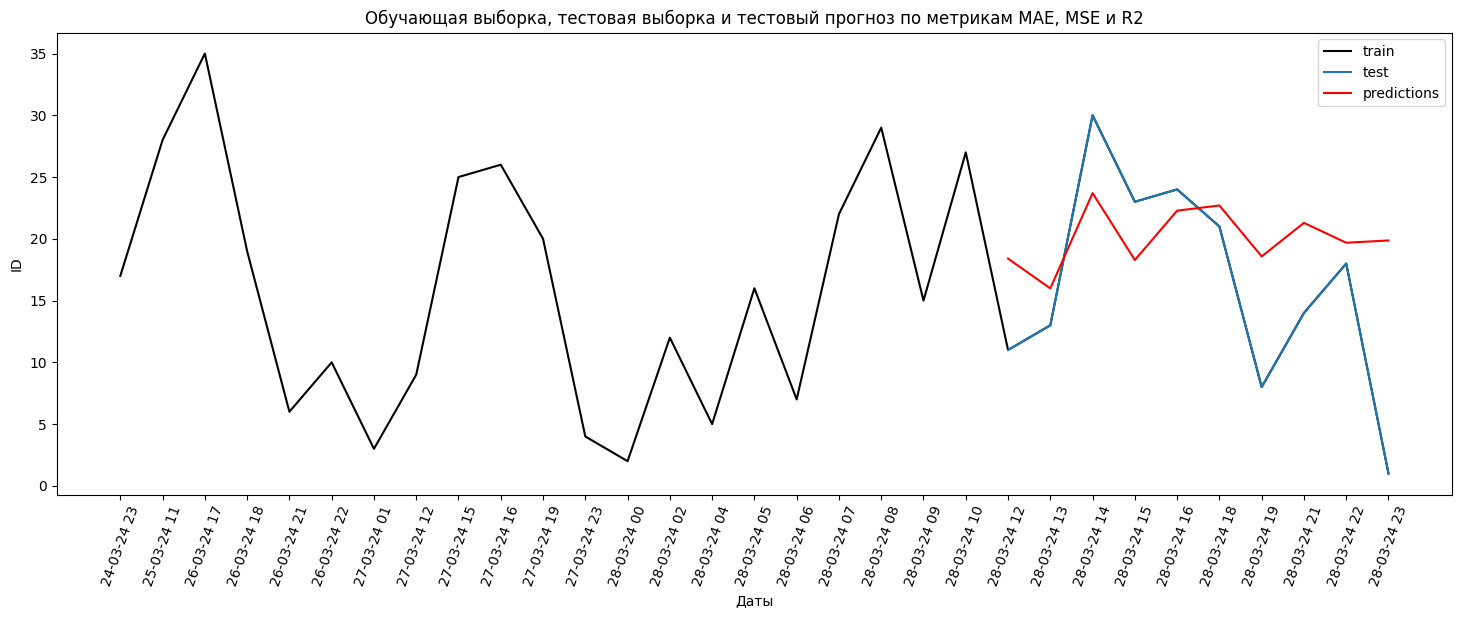

In [98]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='train') # отрисовка графика обучающей выборки
plt.plot(test_sc, label='test')  # отрисовка графика тестовой выборки
plt.plot(predictions_1, color='red', label='predictions') # отрисовка графика прогнозов


plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз по метрикам MAE, MSE и R2') # название графика
plt.legend() # легенда графика
plt.ylabel('ID') # название оси y
plt.xlabel('Даты') # название оси x
plt.xticks(scaner_id.index, rotation=70) # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика

График прогноза с подобранными параметрами по метрикам MAE, MSE, R2.

### Прогнозирование по метрике MAPE

In [99]:
model_2 = ARIMA(train_sc, order=(5,3,2)) # создание модели с подобранными параметрами
model_2_fit = model_2.fit() # обучение модели с подобранными параметрами

In [100]:
predictions_2 = model_2_fit.predict(start, end) # прогноз модели с подобранными параметрами
predictions_2.index = test_sc.index # установка тех же индексов для прогноза, что и для тестовой выборки
predictions_2 # вывод значений прогноза

Дата
28-03-24 12    21.467848
28-03-24 13    29.295050
28-03-24 14    34.090542
28-03-24 15    28.318746
28-03-24 16    37.260816
28-03-24 18    33.516033
28-03-24 19    38.930387
28-03-24 21    42.135231
28-03-24 22    40.091509
28-03-24 23    46.621054
Name: predicted_mean, dtype: float64

Прогноз модели с подобранными параметрами по метрике MAPE.

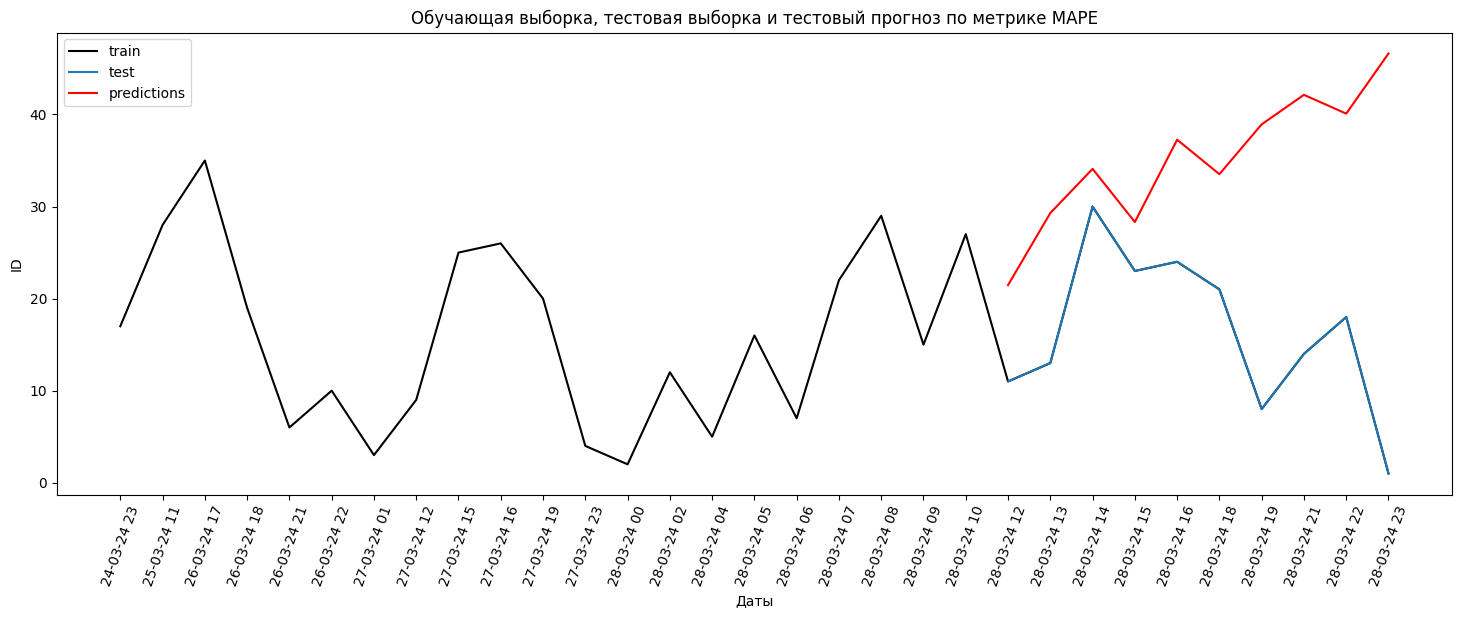

In [101]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='train') # отрисовка графика обучающей выборки
plt.plot(test_sc, label='test')  # отрисовка графика тестовой выборки
plt.plot(predictions_2, color='red', label='predictions') # отрисовка графика прогнозов

plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз по метрике MAPE') # название графика
plt.legend() # легенда графика
plt.ylabel('ID')  # название оси y
plt.xlabel('Даты') # название оси x
plt.xticks(scaner_id.index, rotation=70)  # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика

График прогноза с подобранными параметрами по метрикам MAPE.

В данном случае лучшей моделью прогнозирования оказалась model_1 с параметрами p = 5, d = 1, q = 0.

Аналитическое определение выбранных параметров p, d и q:

1. Авторегрессивная степень (p):
    В данном случае, p = 5, что означает, что мы используем пять предыдущих значений ряда для прогноза.
    Авторегрессия учитывает автокорреляцию между текущим значением и предыдущими значениями.
2. Степень интегрирования (d):
    В данном случае, d = 1, что означает, что мы выполняем одно дифференцирование.
    Дифференцирование помогает устранить тренд и сделать ряд стационарным.
3. Степень скользящего среднего (q):
    В данном случае, q = 0, что означает, что мы не используем предыдущие ошибки прогноза.
    Отсутствие скользящего среднего означает, что мы не учитываем корреляцию между ошибками прогноза.

## График временного ряда для тестовых данных со скользящим средним и стандартным отклонением

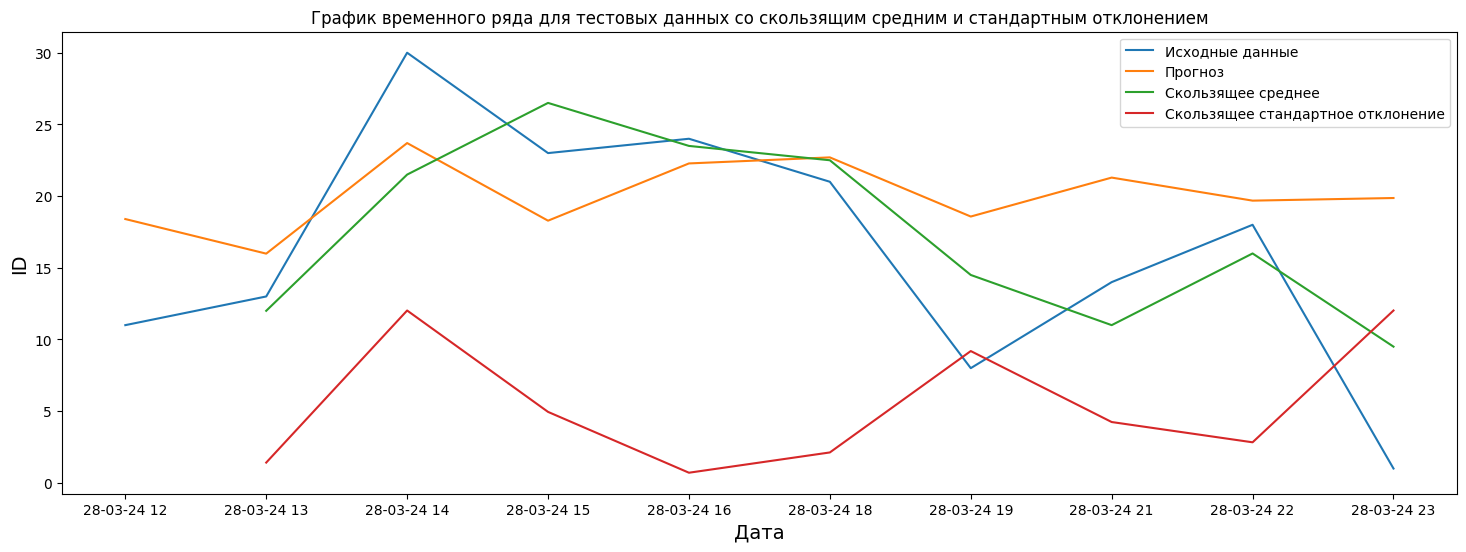

In [102]:
rolling_mean = test_sc.rolling(window=2).mean() # вычисляем скользящее среднее для тестовых данных
rolling_std = test_sc.rolling(window=2).std()  # вычисляем скользящее стандартное отклонение для тестовых данных

fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)
plt.title('График временного ряда для тестовых данных со скользящим средним и стандартным отклонением') # название графика
plt.xlabel('Дата', fontsize=14) # название оси x
plt.ylabel('ID', fontsize=14) # название оси y

plt.plot(test_sc, label='Исходные данные') # отрисовка графика исходных данных
plt.plot(predictions_1, label='Прогноз') # отрисовка графика прогноза
plt.plot(rolling_mean, label='Скользящее среднее') # отрисовка графика скользящего среднего
plt.plot(rolling_std, label='Скользящее стандартное отклонение') # отрисовка графика скользящего стандартного отклонения

plt.legend() # легенда графика
plt.show() # демонстрация графика

График скользящего среднего и стандартного отклонения позволяет определить "ошибки" модели между реальными(исходными) и спрогнозированными данными, когда текущее значение в данных зависит от предыдущих значений(выбран window равный 2, т.е усредняются показатели каждые 2 часа).

### Совмещение графиков Сканер ID и Сканер Куда

In [103]:
scaner_to['Дата'] = pd.to_datetime(scaner_to['Дата'])  # преобразование признака даты в тип данных даты и времени
scaner_to['Дата'] = scaner_to['Дата'].dt.strftime('%y-%m-%d %H')  # представление даты в формате год-месяц-день час
scaner_to.set_index('Дата', inplace=True) # установка даты как индексы таблицы
scaner_to['count'] = scaner_to.groupby('Дата')['Куда'].count() # группировка данных по дате и подсчет количества в эту дату

scaner_to.drop(['Куда'], axis=1, inplace=True)  # удаление признака "Куда" из данных
scaner_to.drop_duplicates(inplace=True) # удаление дубликатов из данных

scaner_to = scaner_to.sort_index(ascending=True) # сортировка индесов по возрастанию

In [104]:
train_to = scaner_to[:alpha] # формирование обучающей выборки
model_to = ARIMA(train_to, order=(5,1,0)) # создание модели с лучшими параметрами
model_to_fit = model_to.fit() # обучение модели с лучшими параметрами
preds_2 = model_to_fit.predict(start, end) # прогноз модели с лучшими параметрами
preds_2.index = test_sc.index # установка тех же индексов на данных прогноза, что и исходные данные
preds_2 # вывод результатов прогноза

Дата
28-03-24 12    18.399796
28-03-24 13    15.987044
28-03-24 14    23.699585
28-03-24 15    18.285722
28-03-24 16    22.278606
28-03-24 18    22.699663
28-03-24 19    18.574585
28-03-24 21    21.291074
28-03-24 22    19.683273
28-03-24 23    19.866614
Name: predicted_mean, dtype: float64

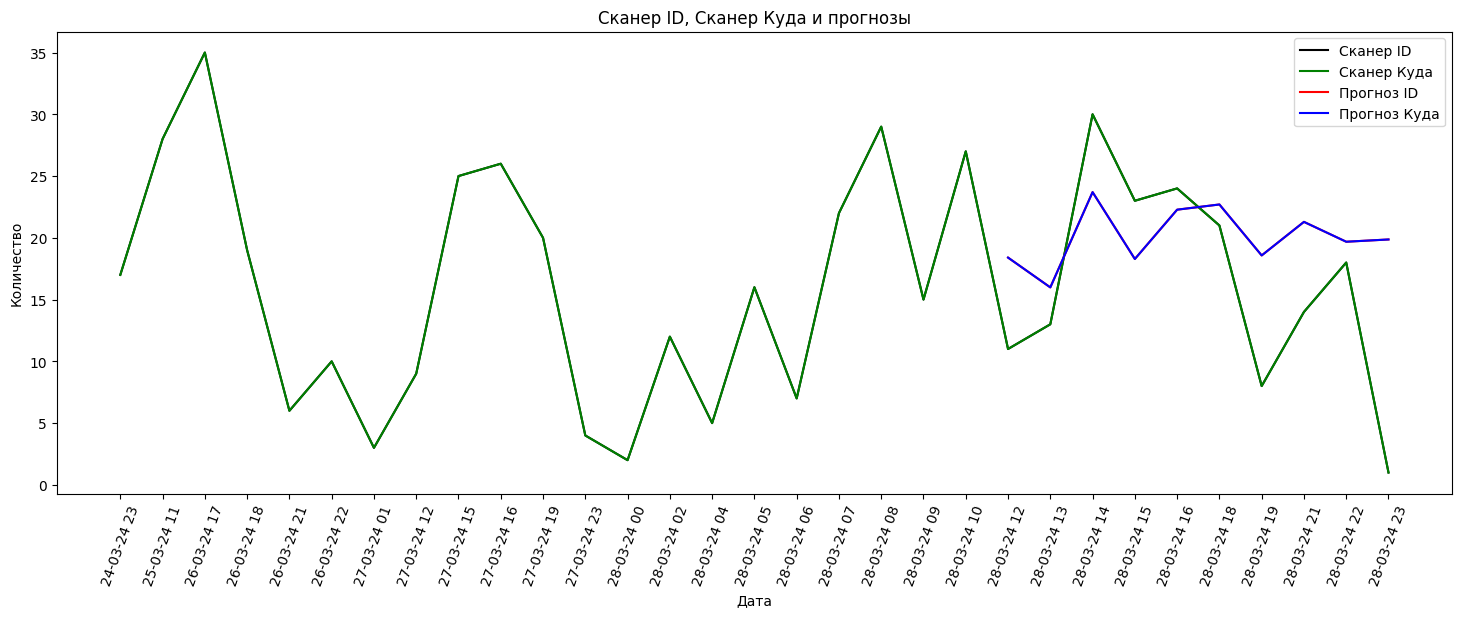

In [105]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='Сканер ID') # отрисовка графика данных сканер ID
plt.plot(scaner_to, color='green', label='Сканер Куда') # отрисовка графика данных сканер Куда
plt.plot(predictions_1, color='red', label='Прогноз ID') # отрисовка графика прогнозов сканер ID
plt.plot(preds_2, color='blue', label='Прогноз Куда') # отрисовка графика прогнозов сканер Куда

plt.title('Сканер ID, Сканер Куда и прогнозы') # название графика
plt.legend() # легенда графика
plt.ylabel('Количество') # название оси y
plt.xlabel('Дата') # название оси x
plt.xticks(scaner_to.index, rotation=70)  # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика

Графики Сканер ID и Сканер Куда полностью совпадают, так как определены как "количество" действий Сканера.

## Прогноз модели с лучшими параметрами на всех данных.

In [106]:
preds_all = model_1_fit.predict(0, len(scaner_id) - 1) # прогноз модели с лучшими параметрами
preds_all.index = scaner_id.index # установка тех же индексов на данных прогноза, что и исходные данные
preds_all # вывод результатов прогноза

Дата
24-03-24 23     0.000000
25-03-24 11    16.999725
26-03-24 17    26.434384
26-03-24 18    32.111745
26-03-24 21    19.450507
26-03-24 22     6.134262
27-03-24 01    11.836554
27-03-24 12    15.019450
27-03-24 15    16.219496
27-03-24 16    19.003914
27-03-24 19    23.588530
27-03-24 23    14.802011
28-03-24 00     0.732131
28-03-24 02     7.108515
28-03-24 04    16.668292
28-03-24 05    13.456938
28-03-24 06    14.587939
28-03-24 07     2.500955
28-03-24 08    21.506038
28-03-24 09    19.258101
28-03-24 10    17.876819
28-03-24 12    18.399796
28-03-24 13    15.987044
28-03-24 14    23.699585
28-03-24 15    18.285722
28-03-24 16    22.278606
28-03-24 18    22.699663
28-03-24 19    18.574585
28-03-24 21    21.291074
28-03-24 22    19.683273
28-03-24 23    19.866614
Name: predicted_mean, dtype: float64

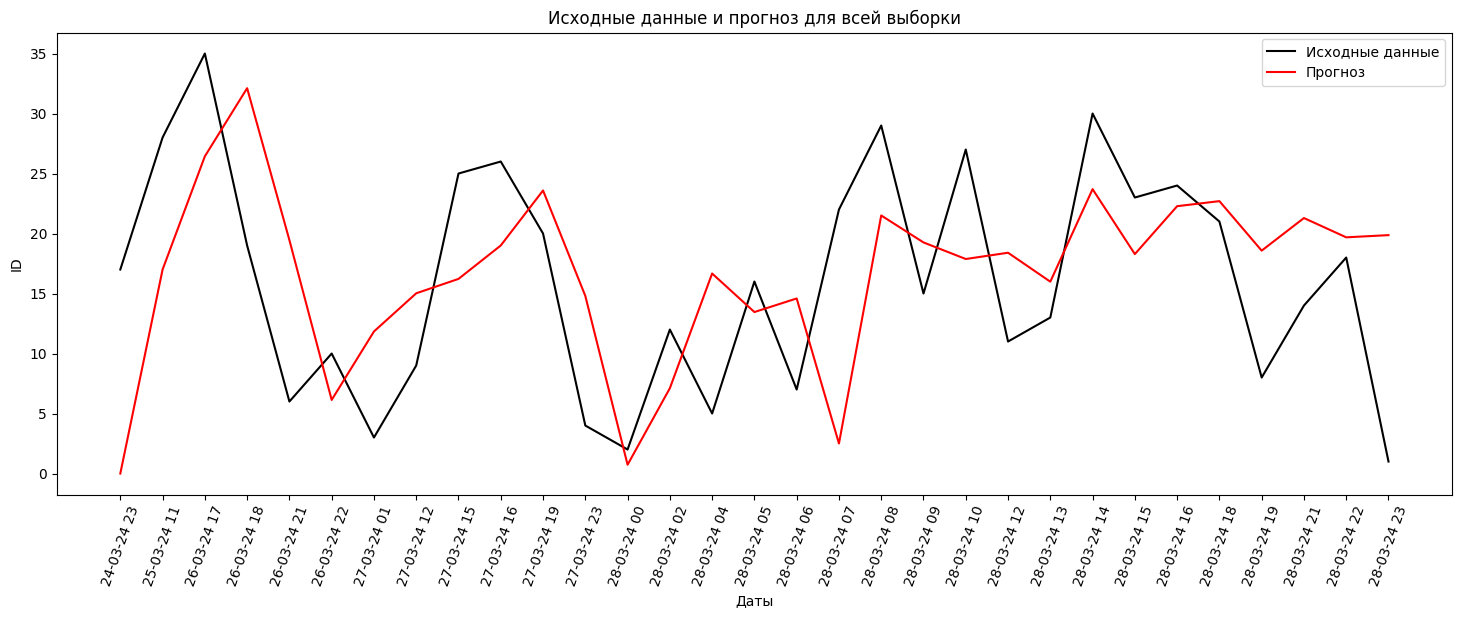

In [107]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='Исходные данные')  # отрисовка графика исходных данных 
plt.plot(preds_all, color='red', label='Прогноз') # отрисовка графика прогнозов 

plt.title('Исходные данные и прогноз для всей выборки') # название графика
plt.legend() # легенда графика
plt.ylabel('ID') # название оси y
plt.xlabel('Даты') # название оси x
plt.xticks(scaner_id.index, rotation=70) # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика

## Прогнозирование на 40% данных
Прогнозирование выполнено на основе 40% от общего объема данных. Это связано с тем, что в наборе данных присутствует всего 5 значений по дням, поэтому прогноз был выполнен для 2 дней

In [108]:
scaner_all = pd.read_excel('/Users/matveyvolshchukov/Desktop/Done_Arima/2024_ИндЗаданиеARIMA/!Исходные данные за 4 дня/Данные для Арима ЛПЦ11/Сканер/LPC_Scaner_Data_ID.xlsx') # считывание исходных данных

In [109]:
scaner_all['Дата'] = pd.to_datetime(scaner_all['Дата']) # преобразование признака даты в тип данных даты и времени
scaner_all['Дата'] = scaner_all['Дата'].dt.strftime('%y-%m-%d') # представление даты в формате год-месяц-день
scaner_all.set_index('Дата', inplace=True) # установка даты как индексы таблицы

In [110]:
scaner_all['id_count'] = scaner_all.groupby('Дата')['ID'].count() # группировка данных по дате и подсчет количества в эту дату

In [111]:
scaner_all.drop('ID', axis=1, inplace=True) # удаление признака ID из данных

In [112]:
scaner_all.drop_duplicates(inplace=True) # удаление дубликатов из данных

In [113]:
scaner_all # вывод таблицы

,id_count
Дата,
28-03-24,374
27-03-24,313
26-03-24,309
25-03-24,230
24-03-24,17


In [114]:
alpha_nw = int(len(scaner_all) * 0.6) # определение порога разделения данных
train_10 = scaner_id[:alpha_nw]  # обучающая выборка
test_10 = scaner_id[alpha_nw:] # тестовая выборка

In [115]:
model_10 = ARIMA(train_10, order=(5,1,0)) # создание модели с лучшими параметрами
model_fit_10 = model_10.fit() # обучение модели с лучшими параметрами а новых данных

In [116]:
start = len(train_10) # точка начала прогнозирования
end = len(train_10) + len(test_10) - 1 # точка окончания прогнозирования

predictions_10 = model_fit_10.predict(start, end) # прогноз модели с лучшими параметрами
predictions_10.index = test_10.index # установка тех же индексов на данных прогноза, что и тестовая выборка
predictions_10 # вывод результатов прогноза

Дата
26-03-24 18    41.334750
26-03-24 21    47.067981
26-03-24 22    52.255481
27-03-24 01    56.947869
27-03-24 12    61.194694
27-03-24 15    65.038265
27-03-24 16    68.516874
27-03-24 19    71.665176
27-03-24 23    74.514537
28-03-24 00    77.093343
28-03-24 02    79.427283
28-03-24 04    81.539609
28-03-24 05    83.451363
28-03-24 06    85.181590
28-03-24 07    86.747527
28-03-24 08    88.164774
28-03-24 09    89.447448
28-03-24 10    90.608329
28-03-24 12    91.658981
28-03-24 13    92.609870
28-03-24 14    93.470469
28-03-24 15    94.249352
28-03-24 16    94.954278
28-03-24 18    95.592269
28-03-24 19    96.169680
28-03-24 21    96.692265
28-03-24 22    97.165229
28-03-24 23    97.593283
Name: predicted_mean, dtype: float64

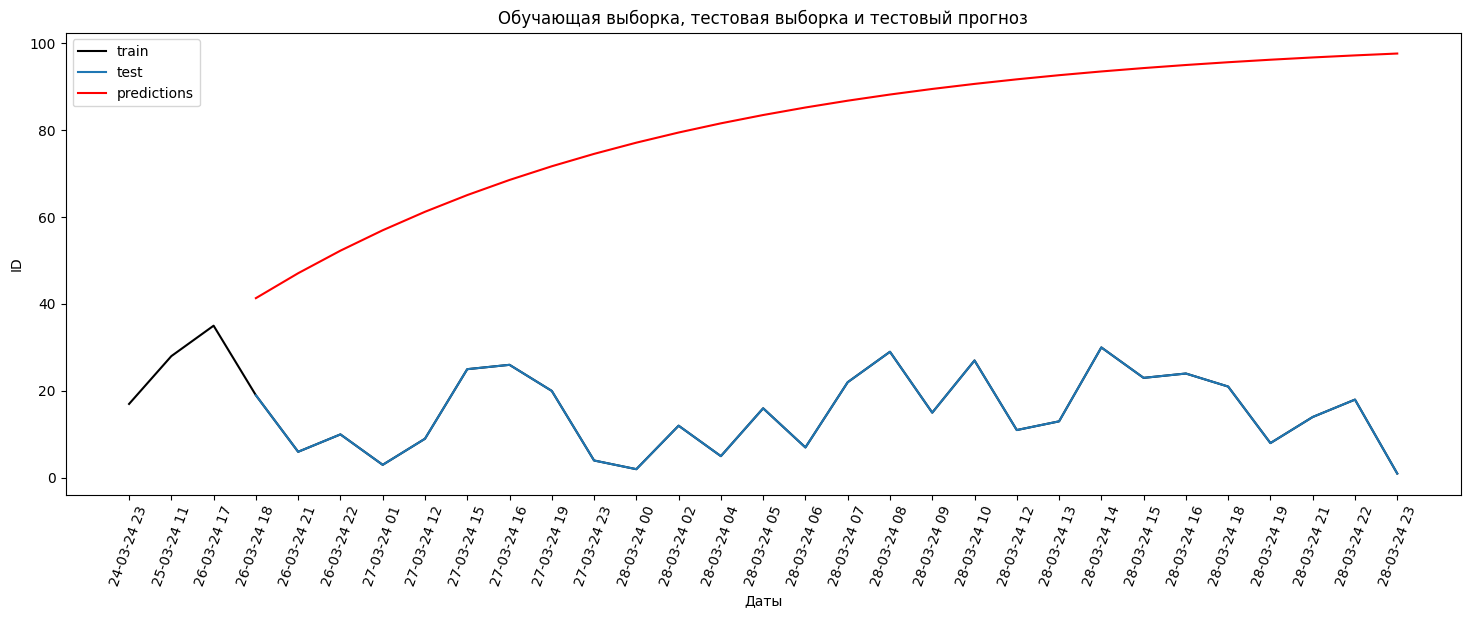

In [117]:
fig = plt.figure(figsize=(18, 6)) # создание фигуры графика размера (18;6)

plt.plot(scaner_id, color='black', label='train') # отрисовка графика обучающей выборки
plt.plot(test_10, label='test') # отрисовка графика тестовой выборки
plt.plot(predictions_10, color='red', label='predictions') # отрисовка графика прогнозов

plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз') # название графика
plt.legend() # легенда графика
plt.ylabel('ID') # название оси y
plt.xlabel('Даты') # название оси x
plt.xticks(scaner_id.index, rotation=70) # поворот значений по оси х на 70 градусов для лучшего отображения

plt.show() # демонстрация графика